In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts

%matplotlib inline

# Data overview

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59914 entries, 0 to 59913
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               59914 non-null  int64  
 1   Column1                  59914 non-null  int64  
 2   dien_tich                59914 non-null  float64
 3   huong_ban_cong           59914 non-null  object 
 4   phong_ngu                59914 non-null  int64  
 5   ten_thanh_pho            59914 non-null  object 
 6   ten_quan                 59914 non-null  object 
 7   so_tang                  59914 non-null  int64  
 8   mat_tien                 59914 non-null  float64
 9   noi_that                 59914 non-null  object 
 10  huong_nha                59914 non-null  object 
 11  so_do                    59914 non-null  object 
 12  gia                      59914 non-null  float64
 13  gia_m2                   59914 non-null  float64
 14  project_name          

In [4]:
df.head()

,Unnamed: 0,Column1,dien_tich,huong_ban_cong,phong_ngu,ten_thanh_pho,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,project_name,ten_duong,do_rong_duong,do_rong_duong_ml,ten_phuong,type,customer_classification,tinh_trang_noi_that
0,6,6,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,nội thất cao cấp,...,990.0,20.625000,không có,Đường Vĩnh Phúc,0.0,không rõ ml,Phường Vĩnh Phúc,aparment,tầm thấp,nội thất cao cấp
1,11,11,50.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,530.0,10.600000,không có,Phố Liễu Giai,0.0,không rõ ml,Phường Liễu Giai,aparment,tầm thấp,nội thất cao cấp
2,18,18,52.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,1100.0,21.153846,không có,Phố Liễu Giai,0.0,không rõ ml,Phường Liễu Giai,aparment,tầm thấp,nội thất cao cấp
3,30,30,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,520.0,10.833333,không có,Đường Đội Cấn,0.0,không rõ ml,Phường Đội Cấn,aparment,tầm thấp,nội thất cao cấp
4,32,32,48.0,không xác định,2,Thành phố Hà Nội,Quận Ba Đình,0,0.0,không rõ,...,520.0,10.833333,không có,Đường Đội Cấn,0.0,không rõ ml,Phường Đội Cấn,aparment,tầm thấp,nội thất cao cấp


## classification 'so_do'

In [5]:
df['so_do'] = df['so_do'].str.lower()

In [6]:
df['tinh_trang_so_do'] = df['so_do'].astype("category").cat.codes

In [7]:
import re

In [8]:
idxkoCoSo = df['so_do'].str.contains(r'không có', flags=re.IGNORECASE, regex=True, na=False)
idxkoCoSo = df.loc[idxkoCoSo == True, ['so_do', 'tinh_trang_so_do']]
idxkoCoSo = list(idxkoCoSo['tinh_trang_so_do'].unique())
df['tinh_trang_so_do'] = df['tinh_trang_so_do'].replace(to_replace = idxkoCoSo, value = 'không có sổ')

In [9]:
idxCoso = df.loc[df['tinh_trang_so_do'] != 'không có sổ', ['so_do', 'tinh_trang_so_do']]
idxCoso = list(idxCoso['tinh_trang_so_do'].unique())
df['tinh_trang_so_do'] = df['tinh_trang_so_do'].replace(to_replace = idxCoso, value = 'có sổ')

# linearRegerssion

In [130]:
forecast = df[['dien_tich', 'phong_ngu', 'gia', 'ten_quan', 'type', 'customer_classification', 'tinh_trang_noi_that', 'tinh_trang_so_do']]

In [131]:
customer_classification = {
    'tầm thấp': 1,
    'tầm trung': 2,
    'tầm cao' : 3
}
types = {
    'aparment': 1,
    'land': 2,
    'road surface': 3
}

so_do = {
    'có sổ' : 1,
    'không có sổ': 2
}
noi_that = {
    'cơ bản': 1,
    'nội thất cao cấp': 2
}
for i in [customer_classification, types, so_do, noi_that]:
    forecast.replace(i,inplace=True)

C:\Users\FPTSHOP\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [132]:
forecast['customer_classification'].unique()

array([1, 2, 3], dtype=int64)

In [133]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59914 entries, 0 to 59913
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dien_tich                59914 non-null  float64
 1   phong_ngu                59914 non-null  int64  
 2   gia                      59914 non-null  float64
 3   ten_quan                 59914 non-null  object 
 4   type                     59914 non-null  int64  
 5   customer_classification  59914 non-null  int64  
 6   tinh_trang_noi_that      59914 non-null  int64  
 7   tinh_trang_so_do         59914 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 3.7+ MB


In [134]:
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace= True )
    return df

In [135]:
forecast = dummies('ten_quan', forecast)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [137]:
x=  forecast.drop('gia', axis = 1)
y = forecast['gia']

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3)

In [139]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [140]:
model.predict(x_test)

array([ 1061.16353997,  1097.96772608,  2163.56751621, ...,
        1780.80534865, 10604.01807491, 15434.02853147])

In [141]:
model.score(x_test, y_test)

0.760214095138469

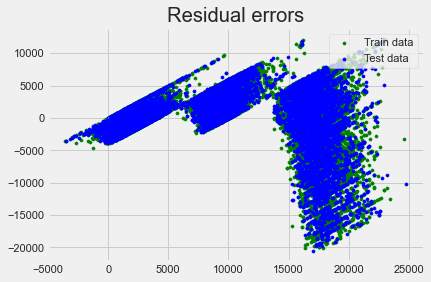

In [142]:

## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()